In [73]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import gc
from scipy import fftpack
gc.collect()

36635

In [74]:
image_file = 'baboon.png'

image = Image.open(image_file).convert('L')
x = np.asarray(image)

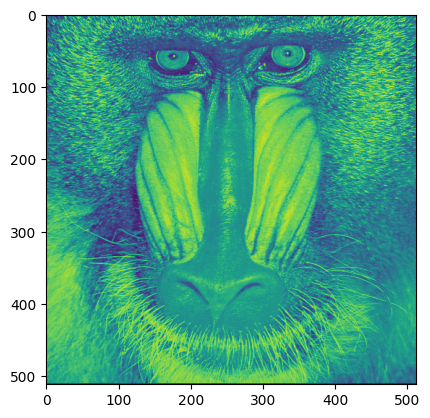

In [75]:
plt.imshow(x)

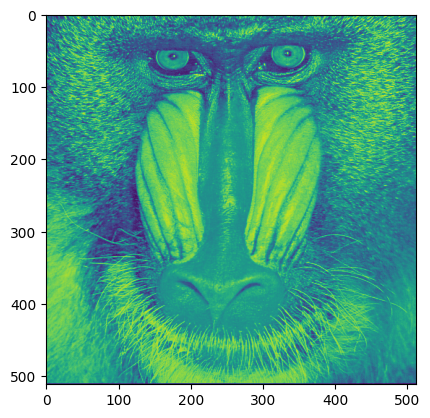

In [76]:
X = np.fft.fftshift(np.fft.fft2(x))
inv = np.fft.ifft2(X)
plt.imshow(abs(inv))

In [77]:
m = 2;  # downsampling coefficient
y = x[::m, ::m]  # input LR image

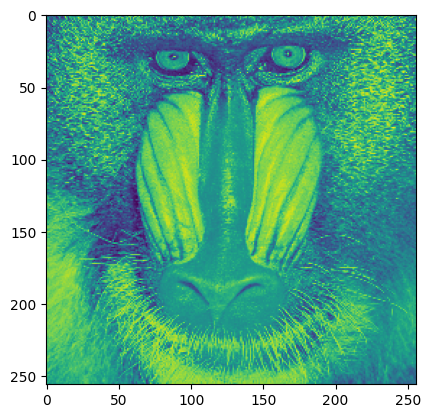

In [78]:
plt.imshow(y)

In [79]:
z = np.zeros(x.shape, dtype=int)
z[::m, ::m] = y

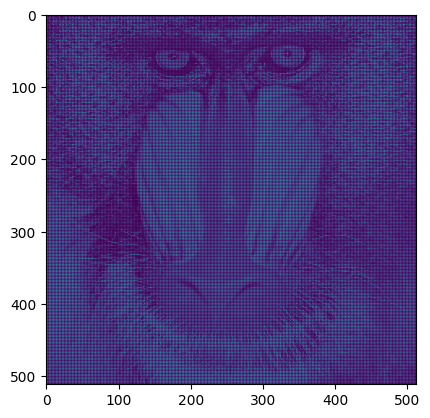

In [80]:
plt.imshow(z)

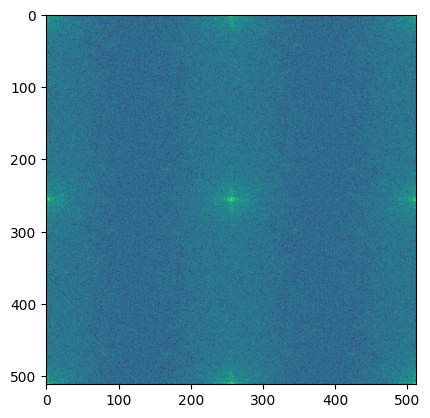

In [81]:
Z = np.fft.fftshift(np.fft.fft2(z))
plt.imshow(np.log(abs(Z)))

In [82]:
def lowpass_filter(fft_array, cutoff_frequency):
    n, m = fft_array.shape
    freq_array = np.fft.fftfreq(n, d=1/n)
    freq_array = np.fft.fftshift(freq_array)
    freq_mask = np.abs(freq_array) <= cutoff_frequency
    filtered_fft = fft_array * freq_mask
    return np.fft.ifftn(filtered_fft)

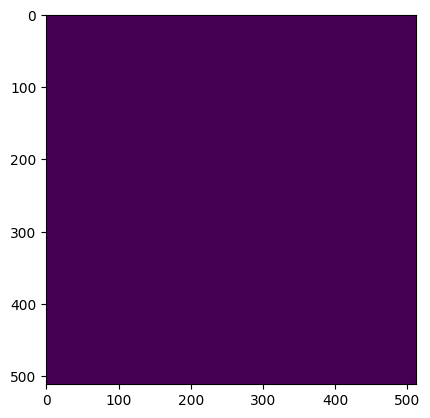

In [86]:
# Test the LPF function and effects
# Z = np.fft.fft2(z)
# Z_hat = Z
# print(Z.max())
# Z_hat[Z_hat > 21295] = 0
# z_hat = abs(np.fft.ifft2(Z_hat))

# plt.imshow(np.log(abs(Z_hat)))
# z_hat[::m, ::m] = z[::m, ::m]  # input LR image
# plt.imshow(z_hat)

z_hat = z
z1 = z

for i in range(200):
    Z = np.fft.fft2(z_hat)
    
    Z_hat = Z
    Z_hat[Z_hat > 21295] = 0
    
    z_hat = abs(np.fft.ifft2(Z_hat))
    
    z_hat[::m, ::m] = z[::m, ::m]  # input SR image
    
    if i == 1:
        z1 = z_hat
    

plt.imshow(z_hat)
plt.imshow(z1 - z_hat)

(256, 256) (512, 512) (256, 256)


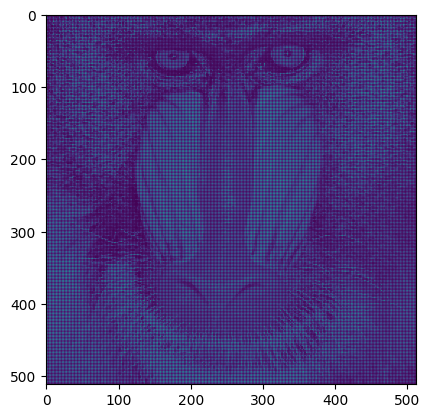

In [84]:
z_hat[::m, ::m] = z[::m, ::m]  # input SR image
# plt.imshow(z_hat[::m, ::m])
plt.imshow(z[::m, ::m])

print(z_hat[::m, ::m].shape, z_hat.shape, z[::m, ::m].shape)
plt.imshow(z_hat)